# Bangalore House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df0 = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df0.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,count
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,13321.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,NaN


In [5]:
df0.shape

(13320, 10)

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   count         1 non-null      float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


# Feature Engineering and outliers detection on each columns

#### drop the unnecessary columns in a dataset

In [7]:
df2 = df0.drop(['area_type','availability','society','balcony','count'],axis = 'columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Removing all the null values in the dataset

In [9]:
df0.isnull().sum()

area_type           0
availability        0
location            1
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
count           13319
dtype: int64

In [10]:
df2 = df2.dropna()

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.shape

(13246, 5)

In [13]:
#size column
def remove_strings(x):
    list0 = x.split(' ')
    return list0[0]
df2['bhk'] = df2['size'].apply(remove_strings)

In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df2 = df2.drop('size',axis=1)
df2['bhk'] = df2['bhk'].astype(int)

In [16]:
df2.info()
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 569.2+ KB
                   location total_sqft  bath   price  bhk
0  Electronic City Phase II       1056   2.0   39.07    2
1          Chikka Tirupathi       2600   5.0  120.00    4
2               Uttarahalli       1440   2.0   62.00    3
3        Lingadheeranahalli       1521   3.0   95.00    3
4                  Kothanur       1200   2.0   51.00    2


In [17]:
#Exploring total_sqft
df2['total_sqft'].value_counts()

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: total_sqft, Length: 2067, dtype: int64

In [18]:
#This method is not working for range values 
df2['total_sqft'] = pd.to_numeric(df2['total_sqft'],errors='coerce').astype('float')

In [19]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [20]:
df2['total_sqfts'] = df0['total_sqft']

In [21]:
df2.head()

,location,total_sqft,bath,price,bhk,total_sqfts
0,Electronic City Phase II,1056.0,2.0,39.07,2,1056
1,Chikka Tirupathi,2600.0,5.0,120.00,4,2600
2,Uttarahalli,1440.0,2.0,62.00,3,1440
3,Lingadheeranahalli,1521.0,3.0,95.00,3,1521
4,Kothanur,1200.0,2.0,51.00,2,1200


In [22]:
df2['total_sqfts_2'] = df0['total_sqft']

In [23]:
df2.head()

,location,total_sqft,bath,price,bhk,total_sqfts,total_sqfts_2
0,Electronic City Phase II,1056.0,2.0,39.07,2,1056,1056
1,Chikka Tirupathi,2600.0,5.0,120.00,4,2600,2600
2,Uttarahalli,1440.0,2.0,62.00,3,1440,1440
3,Lingadheeranahalli,1521.0,3.0,95.00,3,1521,1521
4,Kothanur,1200.0,2.0,51.00,2,1200,1200


In [24]:
#Exploring total_sqfts
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df2[~df2['total_sqfts_2'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk,total_sqfts,total_sqfts_2
30,Yelahanka,NaN,4.0,186.000,4,2100 - 2850,2100 - 2850
122,Hebbal,NaN,4.0,477.000,4,3067 - 8156,3067 - 8156
137,8th Phase JP Nagar,NaN,2.0,54.005,2,1042 - 1105,1042 - 1105
165,Sarjapur,NaN,2.0,43.490,2,1145 - 1340,1145 - 1340
188,KR Puram,NaN,2.0,56.800,2,1015 - 1540,1015 - 1540
410,Kengeri,NaN,1.0,18.500,1,34.46Sq. Meter,34.46Sq. Meter
549,Hennur Road,NaN,2.0,63.770,2,1195 - 1440,1195 - 1440
648,Arekere,NaN,9.0,265.000,9,4125Perch,4125Perch
661,Yelahanka,NaN,2.0,48.130,2,1120 - 1145,1120 - 1145
672,Bettahalsoor,NaN,4.0,445.000,4,3090 - 5002,3090 - 5002


In [25]:
def convert_to_flt(x):
    list1 = x.split('-')
    if(len(list1)==2):
        return (float(list1[0])+float(list1[1]))/2
    try:
        return float(x)
    except:
        return None
df2['total_sqfts_2'] = df2['total_sqfts_2'].apply(convert_to_flt)

In [26]:
df2.head()

,location,total_sqft,bath,price,bhk,total_sqfts,total_sqfts_2
0,Electronic City Phase II,1056.0,2.0,39.07,2,1056,1056.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,2600,2600.0
2,Uttarahalli,1440.0,2.0,62.00,3,1440,1440.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,1521,1521.0
4,Kothanur,1200.0,2.0,51.00,2,1200,1200.0


In [27]:
df2.loc[122]
print((3067+8156)/2)

5611.5


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       13246 non-null  object 
 1   total_sqft     13056 non-null  float64
 2   bath           13246 non-null  float64
 3   price          13246 non-null  float64
 4   bhk            13246 non-null  int32  
 5   total_sqfts    13246 non-null  object 
 6   total_sqfts_2  13200 non-null  float64
dtypes: float64(4), int32(1), object(2)
memory usage: 1.3+ MB


# Adding price_per_sqft

In [29]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqfts_2']

In [30]:
df2.head()

,location,total_sqft,bath,price,bhk,total_sqfts,total_sqfts_2,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,1056,1056.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,2600,2600.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,1440,1440.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,1521,1521.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,1200,1200.0,4250.000000


In [31]:
df3 = df2.copy()

In [32]:
df3.head()

,location,total_sqft,bath,price,bhk,total_sqfts,total_sqfts_2,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,1056,1056.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,2600,2600.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,1440,1440.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,1521,1521.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,1200,1200.0,4250.000000


In [33]:
#explore location column
#here, i am going to apply the dimensionality technique for reducing the location 
df3['location'].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [34]:
#removing trailing and leading space
df3['location'] = df3['location'].apply(lambda x:  x.strip())

In [35]:
#total counts,it can contains the duplicate values also
location_counts = len(df3['location'].values.sum())
print(location_counts)

169893


In [36]:
location_details = df3['location'].value_counts()
location_details
print(location_details.values.sum())

13246


In [37]:
print(len(location_details[location_details<=10]))

1052


In [38]:
print(len(location_details[location_details>10]))

241


In [39]:
df3.dropna(inplace=True)

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13056 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13056 non-null  object 
 1   total_sqft      13056 non-null  float64
 2   bath            13056 non-null  float64
 3   price           13056 non-null  float64
 4   bhk             13056 non-null  int32  
 5   total_sqfts     13056 non-null  object 
 6   total_sqfts_2   13056 non-null  float64
 7   price_per_sqft  13056 non-null  float64
dtypes: float64(5), int32(1), object(2)
memory usage: 867.0+ KB


In [41]:
df3.drop(['total_sqft','total_sqfts',],axis=1,inplace = True)

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13056 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13056 non-null  object 
 1   bath            13056 non-null  float64
 2   price           13056 non-null  float64
 3   bhk             13056 non-null  int32  
 4   total_sqfts_2   13056 non-null  float64
 5   price_per_sqft  13056 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 663.0+ KB


In [43]:
location_lessthan_10 = location_details[location_details<=10]
location_lessthan_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [44]:
def reduce_location(x):
    if x in location_lessthan_10:
        return 'other'
    else:
        return x

    
df3['location'] = df3['location'].apply(reduce_location)

In [45]:
df3[df3['location']=='other']
len(df3[df3['location']=='other'])

2857

In [46]:
len(df3.location.unique())

242

In [47]:
df3.head()

,location,bath,price,bhk,total_sqfts_2,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


# Outliers detection for business logic,Erros

### Here the business logic, it is required 300sqft for  per bedrooms

In [48]:
df3[df3.total_sqfts_2/df3.bhk<300].head()

,location,bath,price,bhk,total_sqfts_2,price_per_sqft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000


In [49]:
df4 = df3[~(df3.total_sqfts_2/df3.bhk<300)]

In [50]:
df4.shape


(12312, 6)

In [51]:
df4.describe()

,bath,price,bhk,total_sqfts_2,price_per_sqft
count,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000
mean,2.562135,111.421129,2.651966,1589.702335,6323.403514
std,1.073093,152.771439,0.973438,1261.895153,4187.211055
min,1.000000,9.000000,1.000000,300.000000,267.829813
25%,2.000000,49.382500,2.000000,1118.000000,4208.545855
50%,2.000000,70.000000,3.000000,1300.000000,5300.000000
75%,3.000000,115.000000,3.000000,1700.000000,6938.987948
max,16.000000,3600.000000,16.000000,52272.000000,176470.588235


In [52]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df5 = remove_pps_outliers(df4)


In [53]:
df5.head()

,location,bath,price,bhk,total_sqfts_2,price_per_sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668


### Let check for 2bhk and 3bhk property prices looks like

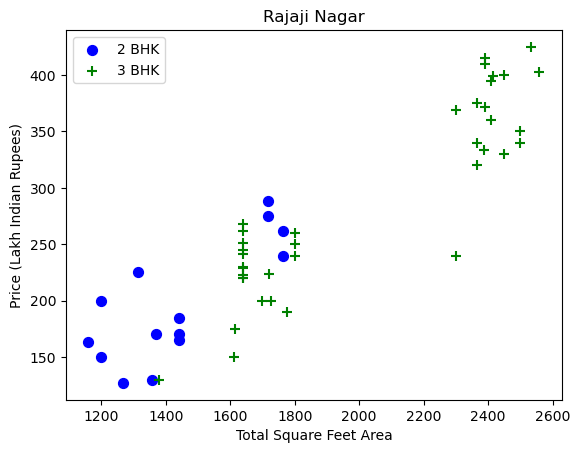

In [54]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
   # plt.rcParamas['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqfts_2,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqfts_2,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,'Rajaji Nagar')

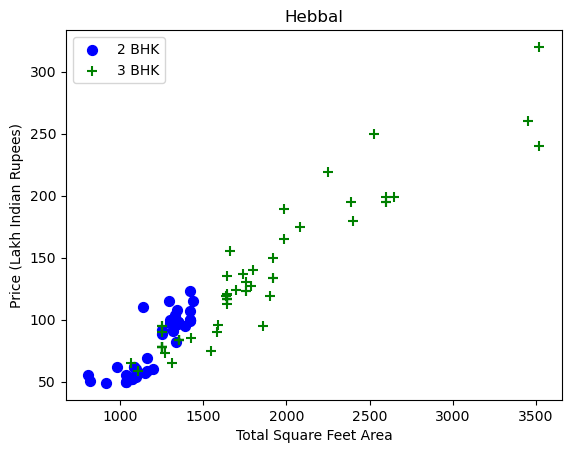

In [55]:
plot_scatter_chart(df5,'Hebbal')

### Here you will seeing that the 3bhk house price is less than the 2bhk apartments in the same location, so we can remove that

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7217, 6)

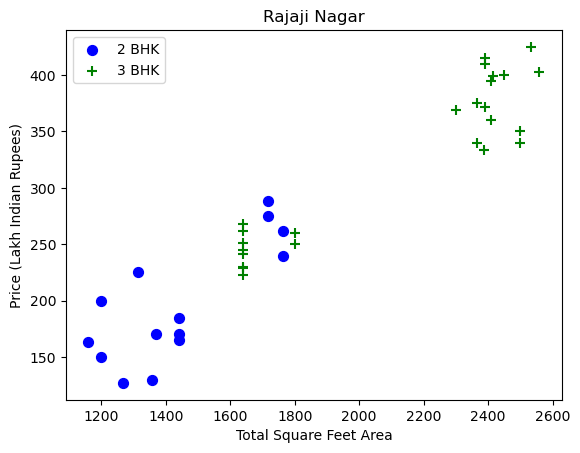

In [57]:
plot_scatter_chart(df6,"Rajaji Nagar")

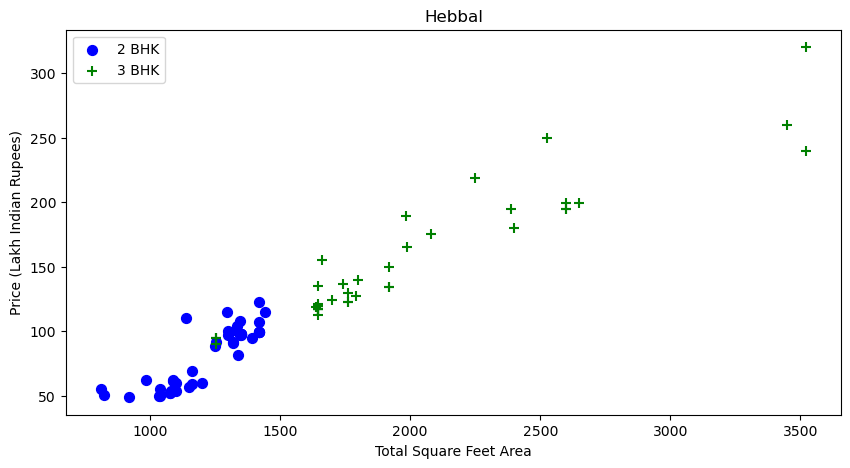

In [58]:
plt.figure(figsize=(10,5))
plot_scatter_chart(df6,"Hebbal")

In [59]:
#outliers detection in bathroom features
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [60]:
df6[df6.bath>df6.bhk+2]

,location,bath,price,bhk,total_sqfts_2,price_per_sqft
1611,Chikkabanavar,7.0,80.0,4,2460.0,3252.032520
5182,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6639,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8313,other,9.0,1000.0,6,11338.0,8819.897689


In [61]:
df7 = df6[df6.bath<df6.bhk+2]

In [62]:
doubt = df6[df6.bhk+2>df6.bath]
doubt.shape

(7144, 6)

In [63]:
doubt.head(2)

,location,bath,price,bhk,total_sqfts_2,price_per_sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491


In [64]:
df7.shape


(7144, 6)

In [65]:
df7.head(2)

,location,bath,price,bhk,total_sqfts_2,price_per_sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491


# One hot Encoding for location columns

In [66]:
dummies = pd.get_dummies(df7.location)

In [67]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')

In [69]:
df8.head()

,location,bath,price,bhk,total_sqfts_2,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df8.drop('location',axis=1,inplace=True)

In [71]:
df8

,bath,price,bhk,total_sqfts_2,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,2.0,70.0,2,1200.0,5833.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10132,1.0,200.0,1,1800.0,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10135,2.0,110.0,2,1353.0,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10136,1.0,26.0,1,812.0,3201.970443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build a Machine Learning Model

In [72]:
X = df8.drop(['price','price_per_sqft'],axis=1)

In [73]:
X.shape

(7144, 244)

In [74]:
X.head()
#print(X.shape)

,bath,bhk,total_sqfts_2,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y = df8.price

In [76]:
y.head(10)

0     428.0
1     194.0
2     235.0
3     130.0
4     148.0
5     413.0
6     368.0
8     167.0
9      85.0
10    210.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Training a model

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
lr.score(X_test,y_test)

0.8046858769913546

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rfr = RandomForestRegressor(n_estimators =35 ,bootstrap=True,n_jobs=-1,max_depth=10)

In [93]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=35, n_jobs=-1)

In [94]:
rfr.score(X_test,y_test)

0.8004333020748633

In [102]:
X.columns

Index(['bath', 'bhk', 'total_sqfts_2', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [104]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]
x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [105]:
#testing output
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

# EVALUATION OF A MODEL

In [106]:
predict_price('1st Phase JP Nagar',2,2,1000)

C:\Users\jnave\OneDrive\Documents\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.21964375516355

In [107]:
predict_price('Indira Nagar',2,2,1000)

C:\Users\jnave\OneDrive\Documents\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


166.1468889335958

In [108]:
predict_price("Indira Nagar",3,3,1000)

C:\Users\jnave\OneDrive\Documents\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


163.34483117088348

In [115]:
predict_price("1st Block Jayanagar",4,4,2850)#4.0,4,2850

C:\Users\jnave\OneDrive\Documents\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


360.04299192640735

# Saving a model 

In [111]:
import joblib

In [112]:
Linear_regression_model = joblib.dump(lr,"BHPP MODEl.txt")

In [113]:
import json

In [114]:
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))